In [1]:
import pandas as pd
import pandas_datareader as pdr
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
df = pd.read_csv('Apple_train.csv')

In [3]:
df.head()

,Unnamed: 0,date,close,high,low,open,volume
0,0.0,25/07/2016,97.34,98.84,96.92,98.250,40382921.0
1,1.0,26/07/2016,96.67,97.97,96.42,96.820,56239822.0
2,2.0,27/07/2016,102.95,104.35,102.75,104.265,92344820.0
3,3.0,28/07/2016,104.34,104.45,102.82,102.830,39869839.0
4,4.0,29/07/2016,104.21,104.55,103.68,104.190,27733688.0


In [4]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [5]:
df

,date,close,high,low,open,volume
0,25/07/2016,97.34,98.84,96.92,98.250,40382921.0
1,26/07/2016,96.67,97.97,96.42,96.820,56239822.0
2,27/07/2016,102.95,104.35,102.75,104.265,92344820.0
3,28/07/2016,104.34,104.45,102.82,102.830,39869839.0
4,29/07/2016,104.21,104.55,103.68,104.190,27733688.0
...,...,...,...,...,...,...
1252,NaN,NaN,NaN,NaN,NaN,NaN
1253,NaN,NaN,NaN,NaN,NaN,NaN
1254,NaN,NaN,NaN,NaN,NaN,NaN
1255,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.dropna(how = 'all',inplace = True)

In [7]:
df['date'].dtype

dtype('O')

In [8]:
df['date'] = pd.to_datetime(df['date']).dt.date

In [9]:
df.head()

,date,close,high,low,open,volume
0,2016-07-25,97.34,98.84,96.92,98.250,40382921.0
1,2016-07-26,96.67,97.97,96.42,96.820,56239822.0
2,2016-07-27,102.95,104.35,102.75,104.265,92344820.0
3,2016-07-28,104.34,104.45,102.82,102.830,39869839.0
4,2016-07-29,104.21,104.55,103.68,104.190,27733688.0


In [10]:
df.dtypes

date       object
close     float64
high      float64
low       float64
open      float64
volume    float64
dtype: object

In [11]:
df['date'] = pd.to_datetime(df['date'])

In [12]:
df.dtypes

date      datetime64[ns]
close            float64
high             float64
low              float64
open             float64
volume           float64
dtype: object

In [13]:
df.set_index('date', inplace = True)

In [14]:
df

,close,high,low,open,volume
date,,,,,
2016-07-25,97.34,98.84,96.92,98.250,40382921.0
2016-07-26,96.67,97.97,96.42,96.820,56239822.0
2016-07-27,102.95,104.35,102.75,104.265,92344820.0
2016-07-28,104.34,104.45,102.82,102.830,39869839.0
2016-07-29,104.21,104.55,103.68,104.190,27733688.0
...,...,...,...,...,...
2021-05-24,127.10,127.94,125.94,126.010,63092945.0
2021-05-25,126.90,128.32,126.32,127.820,72009482.0
2021-05-26,126.85,127.39,126.42,126.955,56575920.0


In [15]:
df.isna().any()

close     False
high      False
low       False
open      False
volume    False
dtype: bool

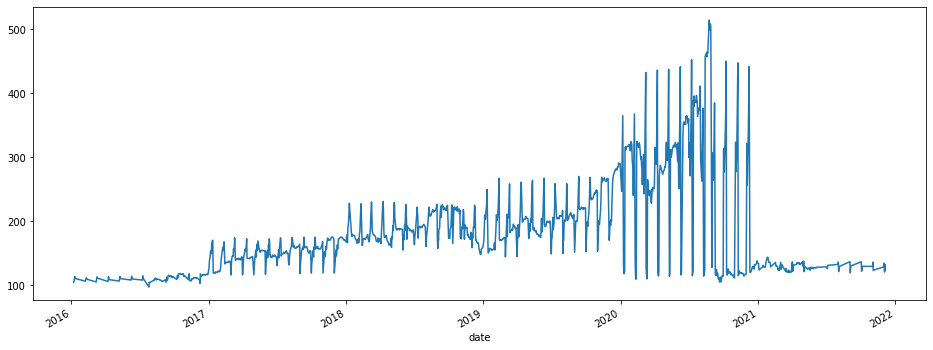

In [16]:
df['open'].plot(figsize = (16,6))

In [17]:
df['volume'] = df['volume'].astype(float)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1221 entries, 2016-07-25 to 2021-05-28
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   1221 non-null   float64
 1   high    1221 non-null   float64
 2   low     1221 non-null   float64
 3   open    1221 non-null   float64
 4   volume  1221 non-null   float64
dtypes: float64(5)
memory usage: 57.2 KB


In [19]:
df.rolling(7).mean().head(10)

,close,high,low,open,volume
date,,,,,
2016-07-25,NaN,NaN,NaN,NaN,NaN
2016-07-26,NaN,NaN,NaN,NaN,NaN
2016-07-27,NaN,NaN,NaN,NaN,NaN
2016-07-28,NaN,NaN,NaN,NaN,NaN
2016-07-29,NaN,NaN,NaN,NaN,NaN
2016-01-08,NaN,NaN,NaN,NaN,NaN
2016-02-08,102.291429,103.197143,101.571429,102.402143,4.693650e+07
2016-03-08,103.498571,104.197143,102.692857,103.339286,4.548218e+07
2016-04-08,104.812857,105.344286,103.958571,104.590714,4.136344e+07


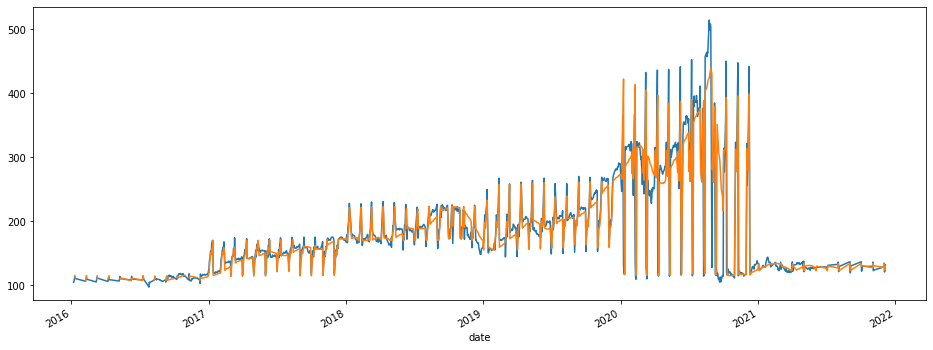

In [20]:
df['open'].plot(figsize = (16,6))
df.rolling(window = 30).mean()['close'].plot()

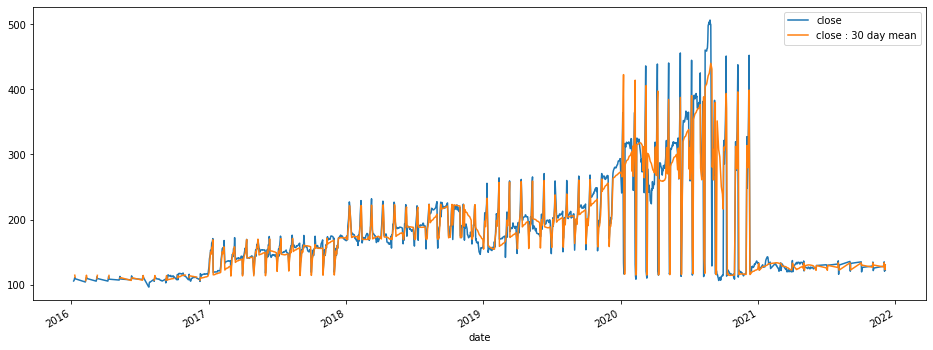

In [21]:
df['close : 30 day mean'] = df['close'].rolling(window = 30).mean()
df[['close', 'close : 30 day mean']].plot(figsize = (16,6))

In [22]:
df.head()

,close,high,low,open,volume,close : 30 day mean
date,,,,,,
2016-07-25,97.34,98.84,96.92,98.250,40382921.0,NaN
2016-07-26,96.67,97.97,96.42,96.820,56239822.0,NaN
2016-07-27,102.95,104.35,102.75,104.265,92344820.0,NaN
2016-07-28,104.34,104.45,102.82,102.830,39869839.0,NaN
2016-07-29,104.21,104.55,103.68,104.190,27733688.0,NaN


In [23]:
df.drop(['close : 30 day mean'], axis = 1, inplace = True)

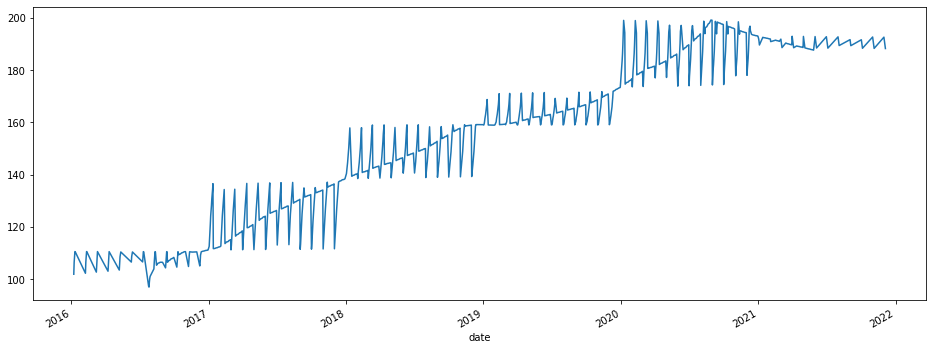

In [24]:
df['close'].expanding(min_periods = 1).mean().plot(figsize = (16,6))

In [25]:
training_set = df['open']
training_set = pd.DataFrame(training_set)

In [26]:
df.isna().any()

close     False
high      False
low       False
open      False
volume    False
dtype: bool

## Data preprocessing

In [27]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [28]:
X_train = []
y_train = []
for i in range(60,1221):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [29]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Feature Extraction

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [31]:
regressor = Sequential()

## Training the Neural Network

In [32]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))


In [33]:
regressor.add(Dropout(0.2))

In [34]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [35]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [36]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [37]:
# output layer
regressor.add(Dense(units = 1))

In [38]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [39]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32) 

Epoch 1/100
37/37 [==============================] - 13s 92ms/step - loss: 0.0144
Epoch 2/100
37/37 [==============================] - 4s 106ms/step - loss: 0.0100
Epoch 3/100
37/37 [==============================] - 4s 115ms/step - loss: 0.0068
Epoch 4/100
37/37 [==============================] - 3s 93ms/step - loss: 0.0059
Epoch 5/100
37/37 [==============================] - 4s 112ms/step - loss: 0.0068
Epoch 6/100
37/37 [==============================] - 4s 110ms/step - loss: 0.0049
Epoch 7/100
37/37 [==============================] - 4s 98ms/step - loss: 0.0057
Epoch 8/100
37/37 [==============================] - 4s 105ms/step - loss: 0.0052
Epoch 9/100
37/37 [==============================] - 4s 113ms/step - loss: 0.0052
Epoch 10/100
37/37 [==============================] - 4s 113ms/step - loss: 0.0039
Epoch 11/100
37/37 [==============================] - 4s 97ms/step - loss: 0.0034
Epoch 12/100
37/37 [==============================] - 4s 103ms/step - loss: 0.0037
Epoch 13/100
37/

In [40]:
dataset_test = pd.read_csv('Apple_test.csv', index_col = "date", parse_dates = True)

In [41]:
real_stock_price = dataset_test.iloc[:,1:2].values

In [42]:
dataset_test.head()

,close,high,low,open,volume
date,,,,,
2021-01-06,124.28,125.35,123.9400,125.08,67637118
2021-02-06,125.06,125.24,124.0500,124.28,59278862
2021-03-06,123.54,124.85,123.1300,124.68,76229170
2021-04-06,125.89,126.16,123.8500,124.07,75169343
2021-07-06,125.90,126.32,124.8321,126.17,71057550


In [43]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 2021-01-06 to 2021-07-21
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   36 non-null     float64
 1   high    36 non-null     float64
 2   low     36 non-null     float64
 3   open    36 non-null     float64
 4   volume  36 non-null     int64  
dtypes: float64(4), int64(1)
memory usage: 1.7 KB


In [44]:
test_set = dataset_test['open']
test_set = pd.DataFrame(test_set)

In [45]:
test_set.head()

,open
date,
2021-01-06,125.08
2021-02-06,124.28
2021-03-06,124.68
2021-04-06,124.07
2021-07-06,126.17


In [46]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 2021-01-06 to 2021-07-21
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    36 non-null     float64
dtypes: float64(1)
memory usage: 576.0 bytes


In [47]:
dataset_total = pd.concat((df['open'], dataset_test['open']), axis = 0)

In [48]:
dataset_total

date
2016-07-25     98.250
2016-07-26     96.820
2016-07-27    104.265
2016-07-28    102.830
2016-07-29    104.190
               ...   
2021-07-15    149.240
2021-07-16    148.460
2021-07-19    143.750
2021-07-20    143.460
2021-07-21    145.530
Name: open, Length: 1257, dtype: float64

In [49]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []

In [50]:
for i in range(60,96):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [51]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [52]:
predicted_stock_price = pd.DataFrame(predicted_stock_price)
predicted_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       36 non-null     float32
dtypes: float32(1)
memory usage: 272.0 bytes


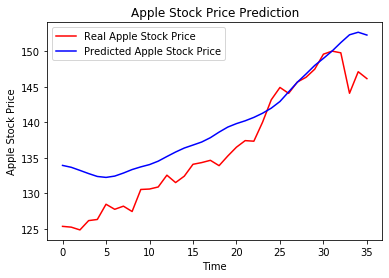

In [53]:
plt.plot(real_stock_price, color = 'red', label = 'Real Apple Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

In [54]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))

4.422343018682731